# Keras test
Test is keras is installed and is it working correctly.

In [1]:
import tensorflow as tf

W1026 19:22:30.511838 140254742484800 __init__.py:690] 

  TensorFlow's `tf-nightly` package will soon be updated to TensorFlow 2.0.

  Please upgrade your code to TensorFlow 2.0:
    * https://www.tensorflow.org/beta/guide/migration_guide

  Or install the latest stable TensorFlow 1.X release:
    * `pip install -U "tensorflow==1.*"`

  Otherwise your code may be broken by the change.

  


In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Reshape from 2D to vector

In [3]:
x_train = x_train.reshape((60000, 28*28))
x_test = x_test.reshape((10000, 28*28))
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


Change image data type to float32 and map to (0,1)

In [4]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

Create model

In [5]:
from tensorflow.keras import models
from tensorflow.keras import layers

New functional way of defining models based on [keras+tf2](https://www.tensorflow.org/guide/keras/functional)

In [6]:
from tensorflow import keras

In [7]:
#network = models.Sequential()
#network.add(layers.Dense(512, activation='relu', input_shape=(28*28, )))
#network.add(layers.Dense(10, activation='softmax'))
#network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

inputs = keras.Input(shape=(28*28, ))
x = layers.Dense(512, activation='relu')(inputs)
outputs = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs, name='minst_model')

W1026 19:22:39.010678 140254742484800 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [8]:
model.summary()

Model: "minst_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Code on tf page didn't work

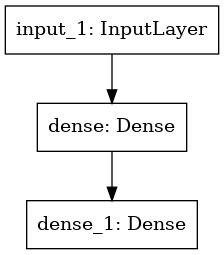

In [10]:
keras.utils.plot_model(model, 'my_first_model.png')


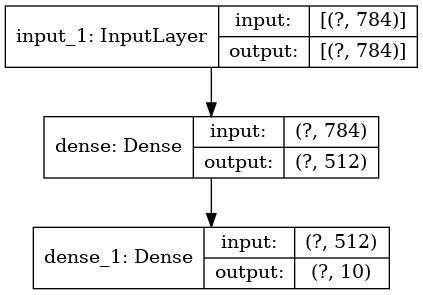

In [11]:
keras.utils.plot_model(model, 'my_first_model_with_shape_info.png', show_shapes=True)

Change labels to categorical. In example if we have 4 labels (1,2,3,4) it will change it to matrix with 4 columns.

Labal 1 -> [1.0, 0.0, 0.0, 0.0]<br/>
Labal 2 -> [0.0, 1.0, 0.0, 0.0]<br/>
Labal 3 -> [0.0, 0.0, 1.0, 0.0]<br/>
Labal 4 -> [0.0, 0.0, 0.0, 1.0]

In [14]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Train network

In [15]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2591 - acc: 0.9242
Epoch 2/5
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1050 - acc: 0.9692
Epoch 3/5
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0689 - acc: 0.9785
Epoch 4/5
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0501 - acc: 0.9852
Epoch 5/5
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0381 - acc: 0.9888


Evaluate

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test acc:', test_acc)

10000/10000 [==============================] - 0s 25us/sample - loss: 0.0730 - acc: 0.9784
test acc: 0.9784
